# Insurance Claims - Fraud Detection

Problem Statement:

Business case:

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not.

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

# Importing the dataset

In [3]:
df1=pd.read_csv("insurance.csv")
df1

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
0         466132  ...                     YES              71610         6510   
1         468176  ...                       ?               5070          780   
2         430632  ...                      NO              34650         7700   
3         608117  ...                      NO              63400         6340   
4         610706  ...                      NO               6500         1300   
..           ...  ...                     ...                ...          ...   
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
0            13020         52080        Saab         92x      2004   
1              780          3510    Mercedes        E400      2007   
2             3850         23100       Dodge         RAM      2007   
3             6340         50720   Chevrolet       Tahoe      2014   
4              650          4550      Accura         RSX      2009   
..             ...           ...         ...         ...       ...   
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
0                Y  NaN  
1                Y  NaN  
2                N  NaN  
3                Y  NaN  
4                N  NaN  
..             ...  ...  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[1000 rows x 40 columns]

# Exploratory Data Analysis

In [3]:
df1.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

In [4]:
df1.sample()

months_as_customer  age  policy_number policy_bind_date policy_state  \
487                  69   24         807369       19-06-1992           IN   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
487   500/1000                500                 1418.5               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
487       614948  ...                      NO              63300        12660   

    property_claim vehicle_claim  auto_make  auto_model auto_year  \
487           6330         44310      Dodge         RAM      2012   

    fraud_reported _c39  
487              N  NaN  

[1 rows x 40 columns]

In [5]:
df1.tail()

months_as_customer  age  policy_number policy_bind_date policy_state  \
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[5 rows x 40 columns]

In [6]:
df1.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

# Checking Null values

In [4]:
df1.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

We can drop _c39 columns, almost all the values in this column is null.

In [5]:
df1.drop('_c39',axis=1,inplace=True)
df1

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... witnesses police_report_available total_claim_amount  \
0         466132  ...         2                     YES              71610   
1         468176  ...         0                       ?               5070   
2         430632  ...         3                      NO              34650   
3         608117  ...         2                      NO              63400   
4         610706  ...         1                      NO               6500   
..           ...  ...       ...                     ...                ...   
995       431289  ...         1                       ?              87200   
996       608177  ...         3                       ?             108480   
997       442797  ...         3                     YES              67500   
998       441714  ...         1                     YES              46980   
999       612260  ...         3                       ?               5060   

    injury_claim property_claim  vehicle_claim   auto_make auto_model  \
0           6510          13020          52080        Saab        92x   
1            780            780           3510    Mercedes       E400   
2           7700           3850          23100       Dodge        RAM   
3           6340           6340          50720   Chevrolet      Tahoe   
4           1300            650           4550      Accura        RSX   
..           ...            ...            ...         ...        ...   
995        17440           8720          61040       Honda     Accord   
996        18080          18080          72320  Volkswagen     Passat   
997         7500           7500          52500      Suburu    Impreza   
998         5220           5220          36540        Audi         A5   
999          460            920           3680    Mercedes       E400   

    auto_year fraud_reported  
0        2004              Y  
1        2007              Y  
2        2007              N  
3        2014              Y  
4        2009              N  
..        ...            ...  
995      2006              N  
996      2015              N  
997      1996              N  
998      1998              N  
999      200

In [6]:
df1.isin(['?']).sum() #Checking for ? values in dataset

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [7]:
#Checking collision_type unique values with value count
df1['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [8]:
#Checking property_damage unique values with value count
df1['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [9]:
#Checking police_report_available unique values with value count
df1['police_report_available'].value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [10]:
# Replacing '?' by the most common collision type using mode
df1['collision_type']=df1['collision_type'].replace('?', 'Rear Collision')

# If there is no values in property_damage then it means no property damage.
df1['property_damage']=df1['property_damage'].replace('?', 'NO')

# If there is nothing in police_report_available, that means there is no FIR and nothing.
df1['police_report_available']=df1['police_report_available'].replace('?', 'NO')

In [11]:
df1.isin(['?']).sum() #Checking for ? values in dataset

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

<AxesSubplot:>

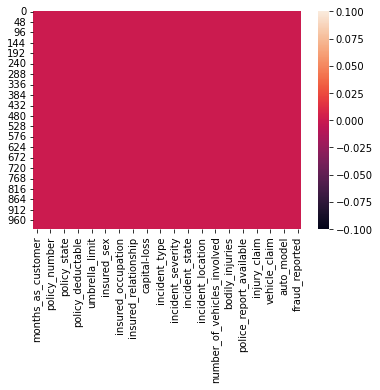

In [13]:
sns.heatmap(df1.isnull())

# Univariate Analysis

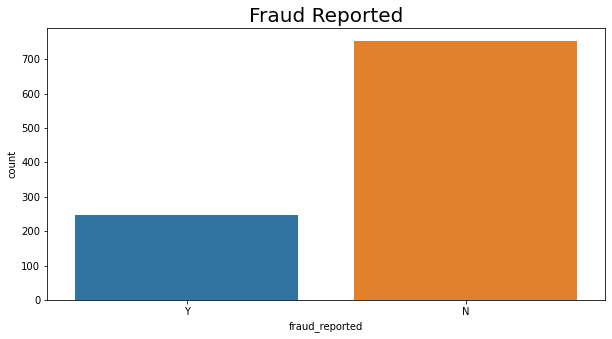

In [17]:
plt.figure(figsize = (10,5))
sns.countplot(x="fraud_reported", data=df1)
plt.title("Fraud Reported", fontsize = 20)
plt.show()

We can clearly see that near 200-300 Fraud happened where more than 700 time Fraud didn't happen.

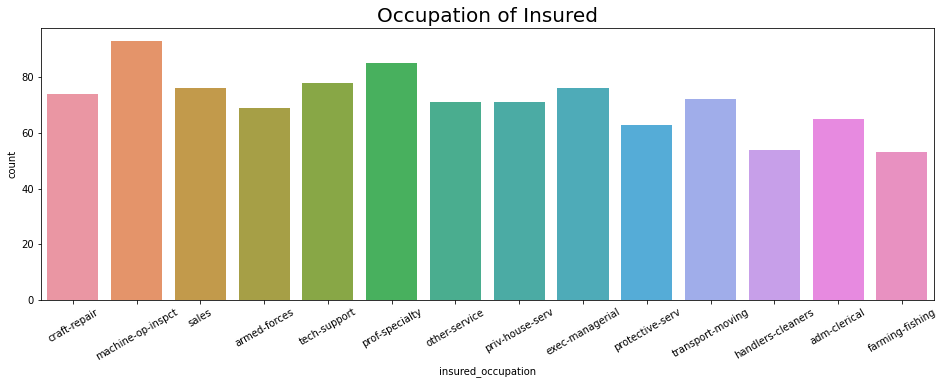

In [19]:
plt.figure(figsize = (16,5))
ax=sns.countplot(x="insured_occupation", data=df1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.title("Occupation of Insured", fontsize = 20)
plt.show()

Machine-op-inspct people have more insurance where as handlers-cleaners have less number of insurance policy.

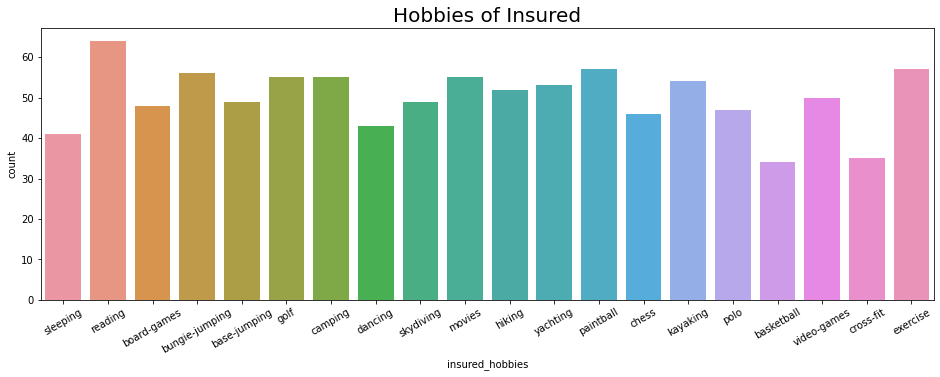

In [21]:
plt.figure(figsize = (16,5))
ax=sns.countplot(x="insured_hobbies", data=df1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.title("Hobbies of Insured", fontsize = 20)
plt.show()

People who took insurance policy have more number of peoples who have reading habbits where as people who play basketball have less policies.

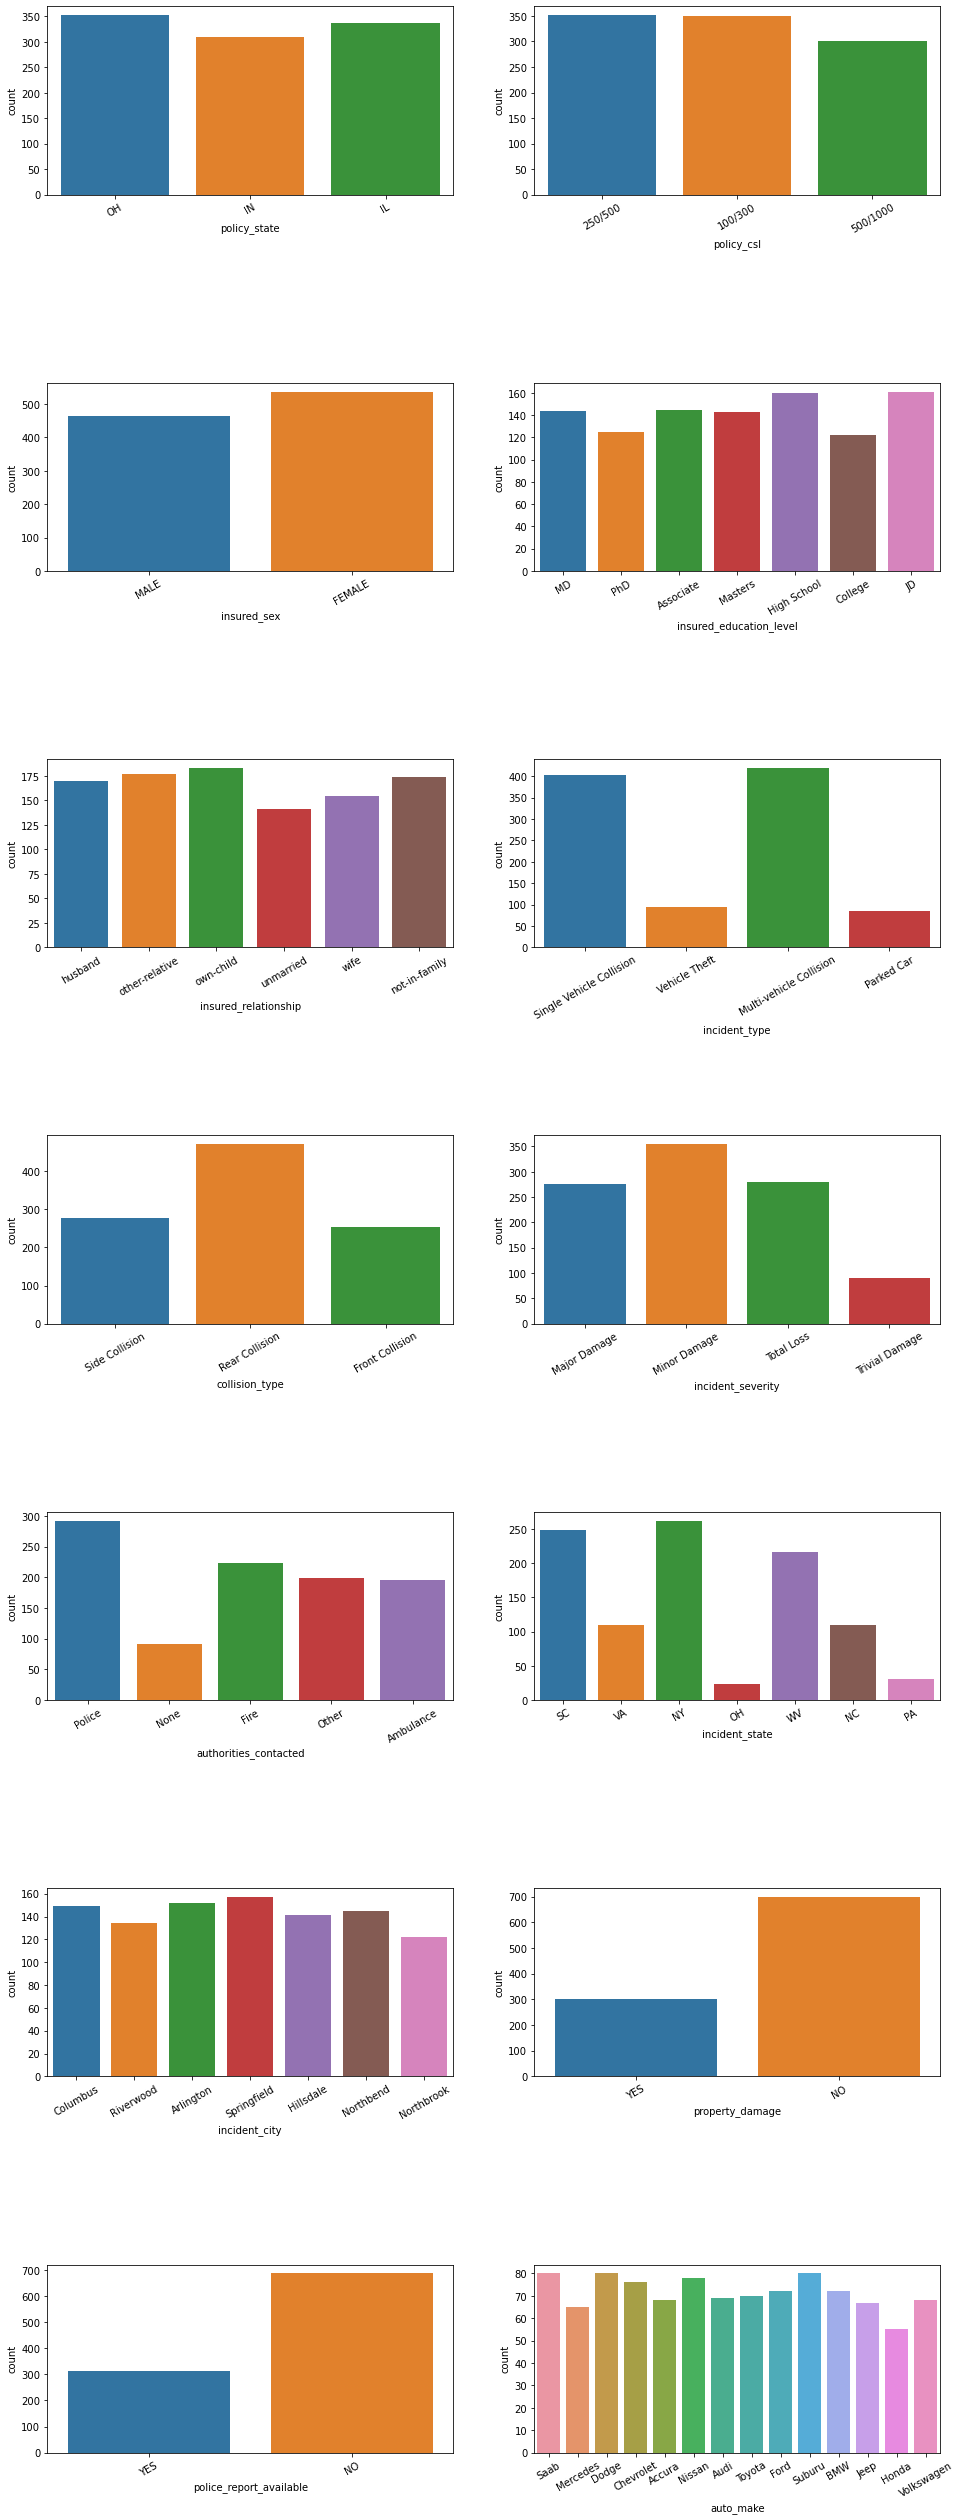

In [25]:
label_list = ['policy_state','policy_csl','insured_sex','insured_education_level','insured_relationship','incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city','property_damage','police_report_available','auto_make']
fig,axes = plt.subplots(7,2,figsize=(16,45))
for i,cat in enumerate(label_list):
    row,col = i//2,i%2 #getting size of plots in row and cols 
    ax=sns.countplot(x=cat,data=df1,ax=axes[row,col]) #Plotting count plot with hue Loan Status
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.subplots_adjust(hspace=1) # Plotting the graphs

Policy_state is high in OH and IL where as low in IN.

Policy_csl is 250/500 and 100/300 is high where as 500/1000 is less.

Female applied for Insurance more than Male.

Mosty insured person have education level High School and JD.

The person who have child, those peoples did insurances more.

Singlie Vehicle Collision and Multi vehicle Collision had more incident where as Vehile Theft and Parked car incidents are less.

Rear Collision is more than 400 where as Front collision is less.

Minor Damages are happen more where as Trival Damages are less.

People contacted more and in very less conditions people didn't call to anyone.

More incident happen in NY where as in OH very less incident happen.

Almost all cities have same number of incidents.

Property damages are less.

Police reports are available only in 30% cases.

All cars are insured equally near 60-80.

# Bivariate Analysis

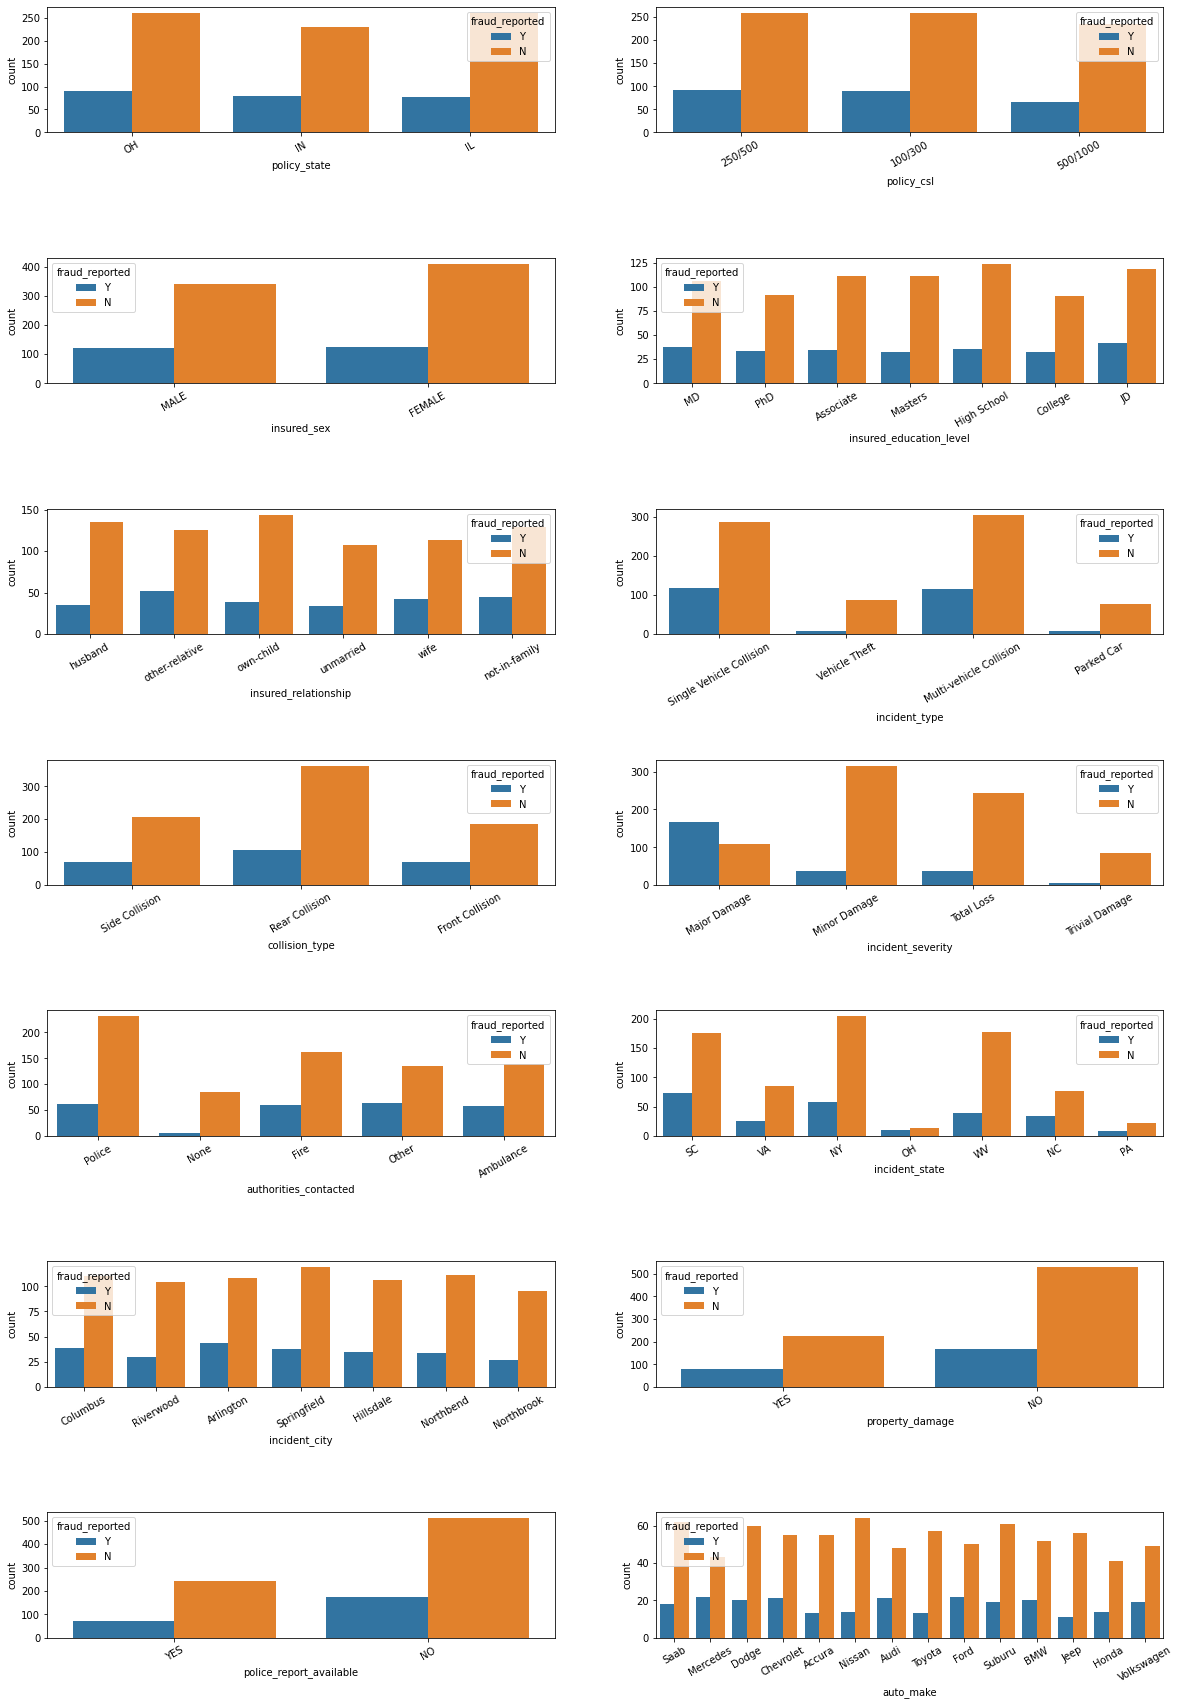

In [26]:
fig,axes = plt.subplots(7,2,figsize=(20,30))
for i,cat in enumerate(label_list):
    row,col = i//2,i%2 #getting size of plots in row and cols 
    ax=sns.countplot(x=cat,data=df1,hue='fraud_reported',ax=axes[row,col]) #Plotting count plot with hue Loan Status
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.subplots_adjust(hspace=1) # Plotting the graphs

In OH and IL Policy state Fraud didn't happen much when comapred with IN. In IN Fraud happen more than OH and IL.

In Policy_csl 250/500 and 100/300 Fraud reported more than 500/1000.

More number of Fraud case reported against Female.

Person who have education level JD did more frauds than others.

People who have other relatives has reported highest fraude cases.

In case of Singlie Vehicle Collision and Multi vehicle Collision maximum frauds happened.

When Collision type is Rear, Fraud reported more.

At the time of Major Damages, Fraud is reported too high.

When People didn't call to anyone that time Fraud happen very less. If person contacted to anyone, Fraud happened.

In SC state Fraue Reported more than other states.

Almost all cities have same number of Fraud Reported.

When Property is not damages that time Fraud happed more.

When there is no Police report available that time Fraaud happen more.

Mercedes and Ford have more number of Fraud Reported.

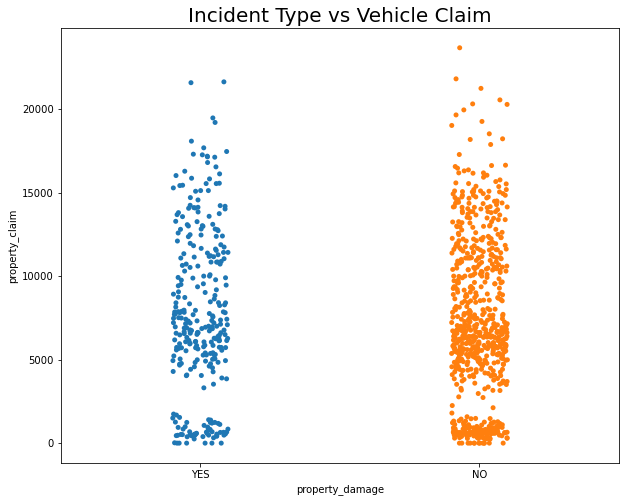

In [27]:
plt.figure(figsize = (10,8))
sns.stripplot(df1['property_damage'], df1['property_claim'])
plt.title('Incident Type vs Vehicle Claim', fontsize = 20)
plt.show()

We can clearly see that People ask for claim regardless of whether property damage or not.

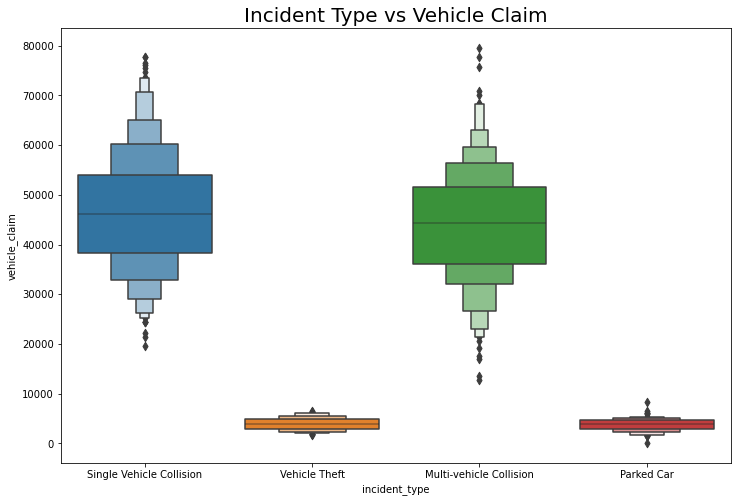

In [28]:
plt.figure(figsize = (12,8))
sns.boxenplot(df1['incident_type'], df1['vehicle_claim'])
plt.title('Incident Type vs Vehicle Claim', fontsize = 20)
plt.show()

We can clearly see People do Vehicle claim when Single Vehicle Collision or Multi-vehicle Collision happen.

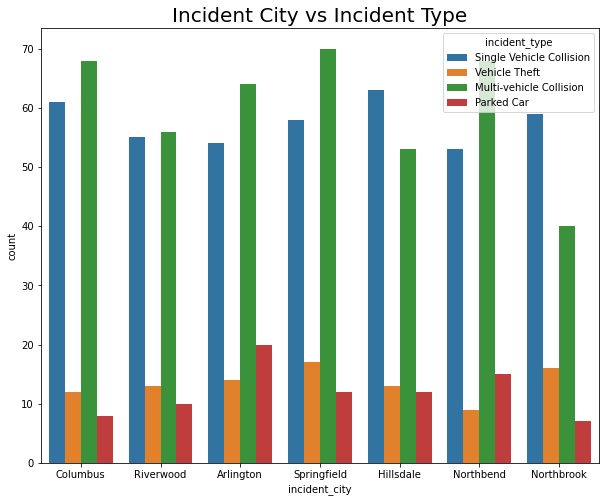

In [29]:
plt.subplots(figsize=(10, 8))
sns.countplot(x='incident_city',hue='incident_type',data=df1)
plt.title('Incident City vs Incident Type', fontsize = 20)
plt.show()

We can clearly see that in every city Single Vehicle Collision and Multi-vehicle Collision happened most of the times.

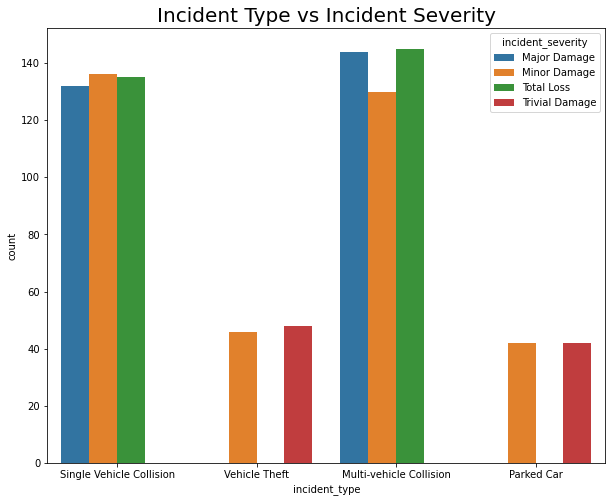

In [30]:
plt.subplots(figsize=(10, 8))
sns.countplot(x='incident_type',hue='incident_severity',data=df1)
plt.title('Incident Type vs Incident Severity', fontsize = 20)
plt.show()

We can clearly see that In Single Vehicle collision and Multi-vehicle collision, Mjor Damage,Minor Damage and Total loss happened, where as when Vehicle is Theft or car was parked that time Minor damage and Trival Damage happen.

# Multivariate Analysis

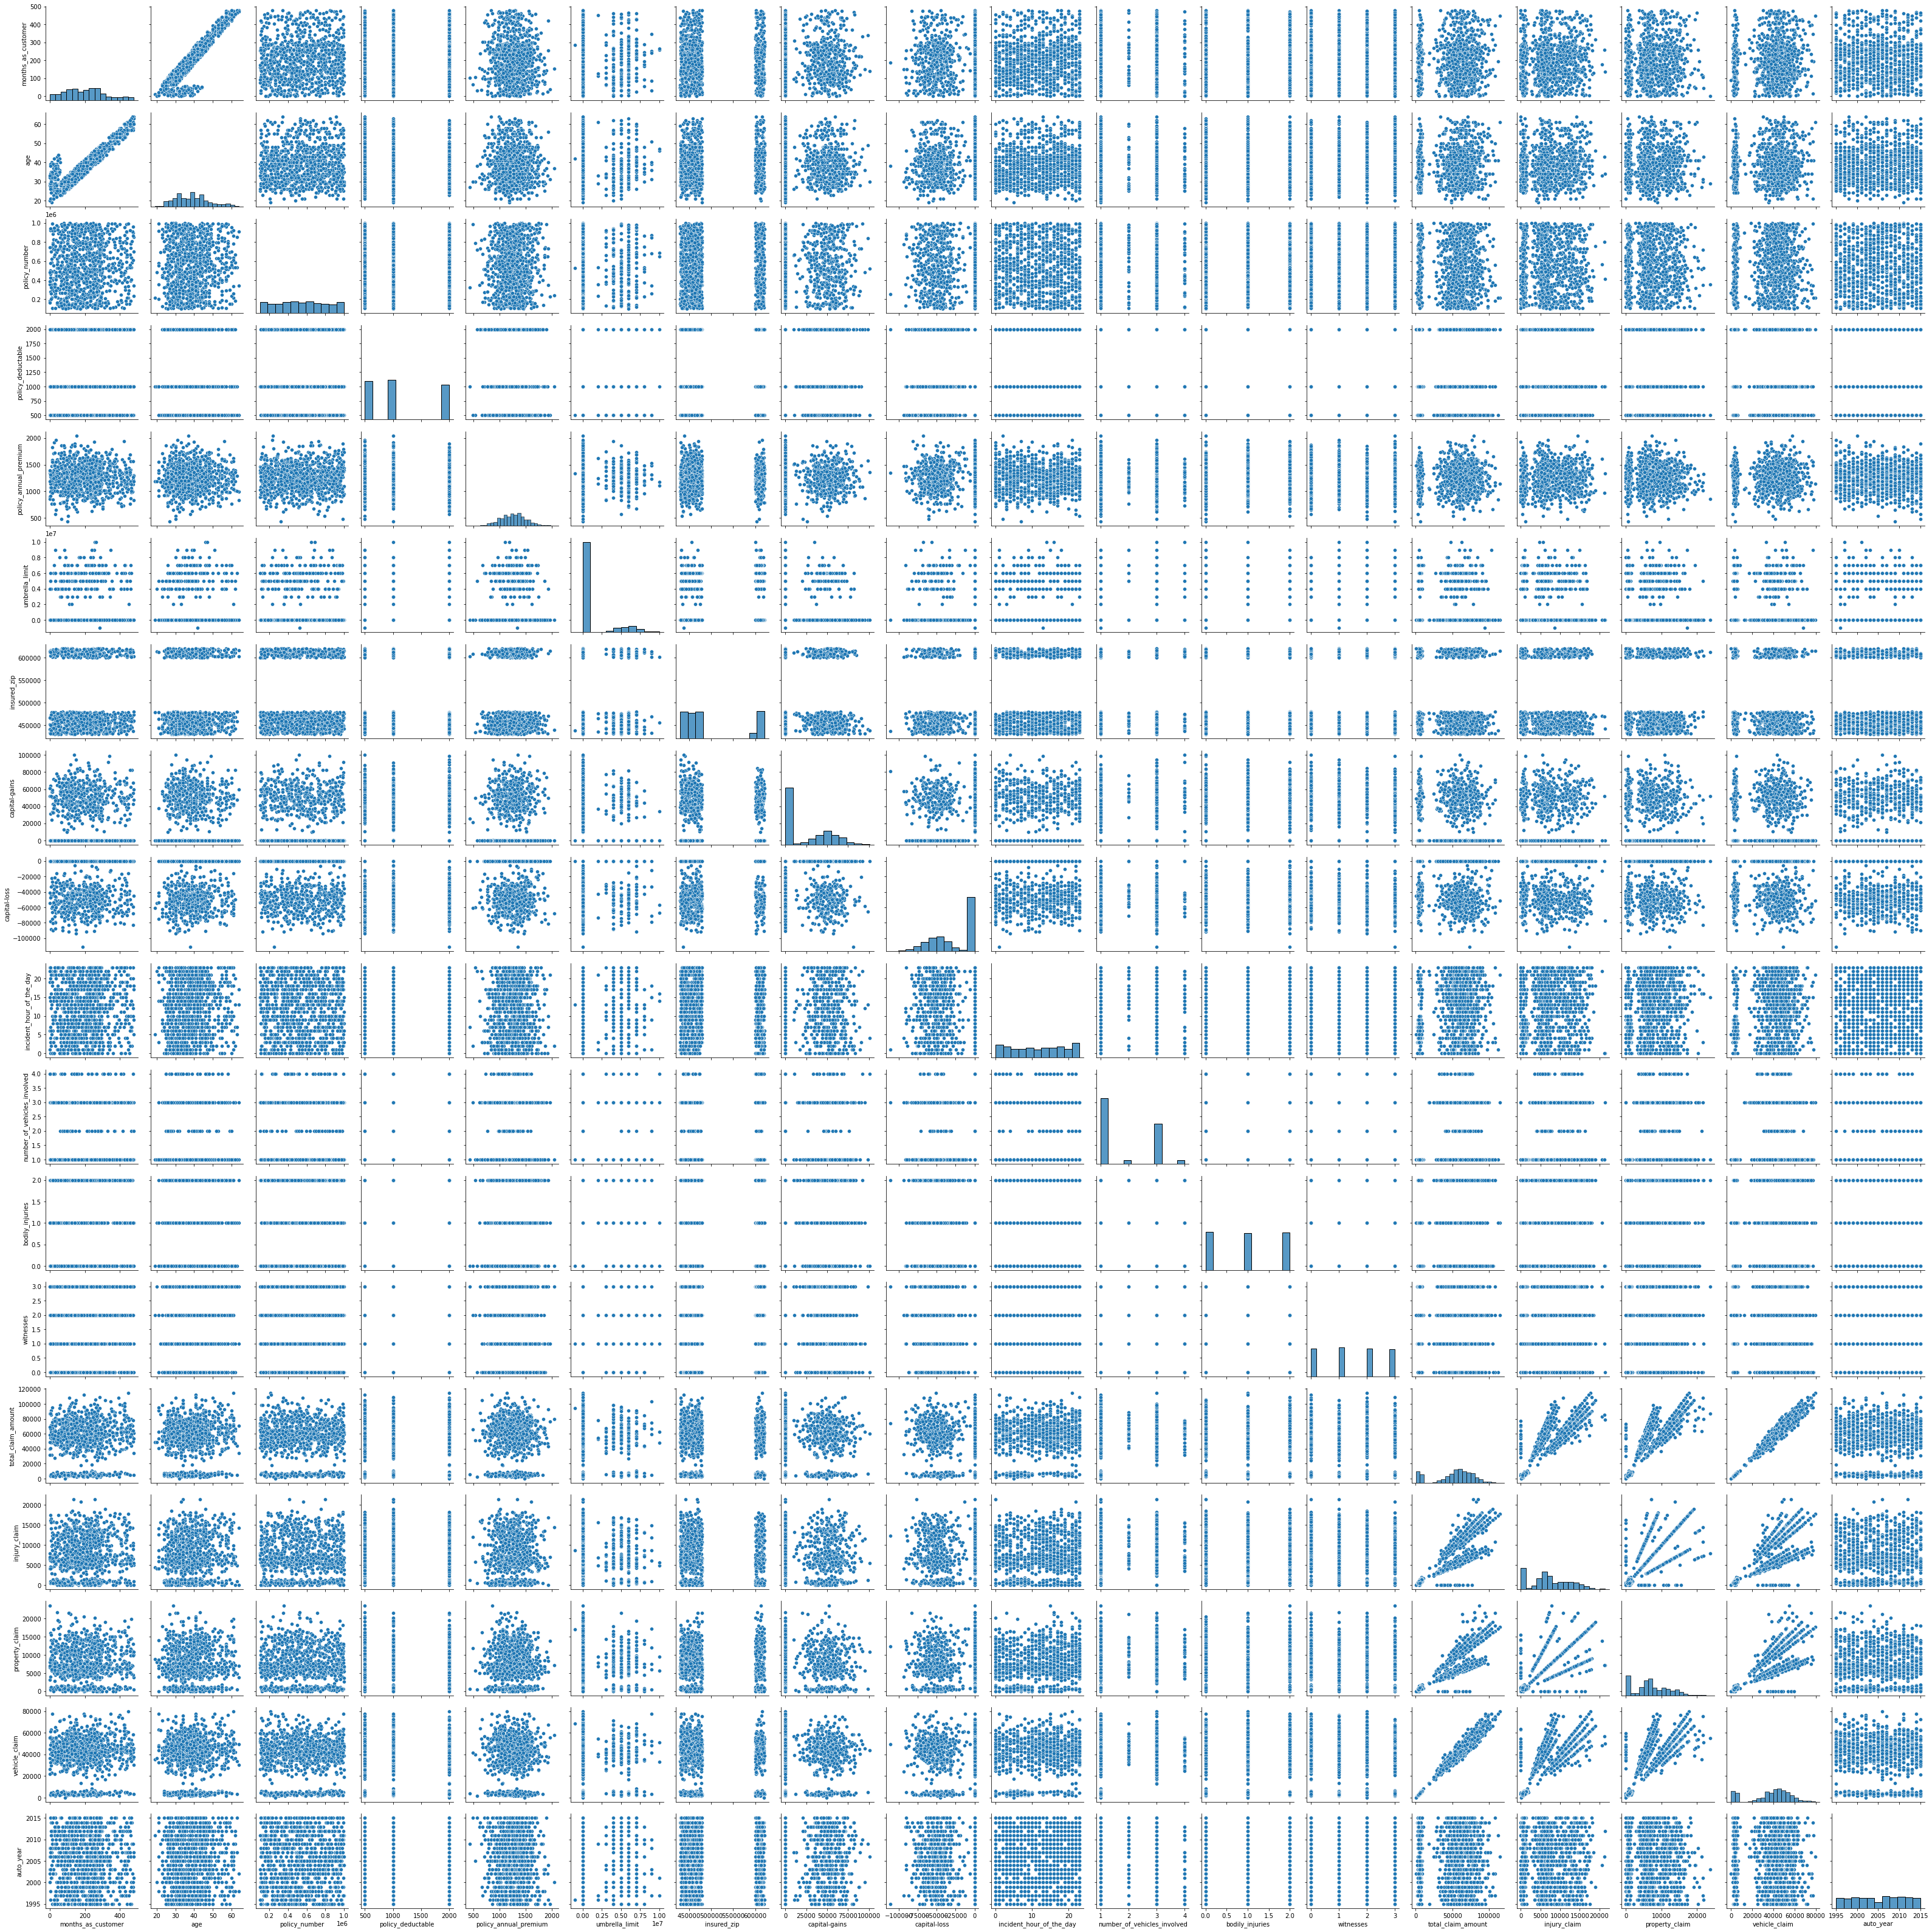

In [31]:
sns.pairplot(df1)

# Summary Statistics

In [32]:
df1.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  
count     1000.000000    1000.000000  1000.000000  
mean      7399.570000   37928.950000  2005.103000  
std       4824.726179   18886.252893     6.015861  
min          0.000000      70.000000  1995.000000  
25%       4445.000000   30292.500000  2000.000000  
50%       6750.000000   42100.000000  2005.000000  
75%      10885.000000   50822.500000  2010.000000  
max      23670.000000   79560.000000  2015.000000

Too much difference in values so Scaling is required. Few columns have too much difference in mean, median and std, so outliers and skewness also present in the data. We'll remove that also.

In [33]:
df1['policy_csl'].unique()

array(['250/500', '100/300', '500/1000'], dtype=object)

In [34]:
df1['csl_per_person']=df1.policy_csl.str.split('/',expand=True)[0]
df1['csl_per_accident']=df1.policy_csl.str.split('/',expand=True)[1]

In [35]:
#Converting Auto Year into Vehicle Age by subtracting 2020
df1['vehicle_age'] = 2020 - df1['auto_year']

In [36]:
df1.drop(['policy_csl', 'auto_year', 'policy_number', 'insured_zip', 'policy_bind_date', 'incident_date','incident_location','incident_hour_of_the_day'], axis=1, inplace=True)

Reason behind dropping these columns -

---> Policy number is unique for each policy.

---> Insured Zip is pin code from where policy created.

---> Policy bind date is policy date.

---> Incident date is the date when incident happen.

---> Incident location is where incident happen.

---> Incident hour of the day is what what time incident happen.

All of those columns are not gonna help us to predict something, So we'll drop these columns.

In [37]:
df1

months_as_customer  age policy_state  policy_deductable  \
0                   328   48           OH               1000   
1                   228   42           IN               2000   
2                   134   29           OH               2000   
3                   256   41           IL               2000   
4                   228   44           IL               1000   
..                  ...  ...          ...                ...   
995                   3   38           OH               1000   
996                 285   41           IL               1000   
997                 130   34           OH                500   
998                 458   62           IL               2000   
999                 456   60           OH               1000   

     policy_annual_premium  umbrella_limit insured_sex  \
0                  1406.91               0        MALE   
1                  1197.22         5000000        MALE   
2                  1413.14         5000000      FEMALE   
3                  1415.74         6000000      FEMALE   
4                  1583.91         6000000        MALE   
..                     ...             ...         ...   
995                1310.80               0      FEMALE   
996                1436.79               0      FEMALE   
997                1383.49         3000000      FEMALE   
998                1356.92         5000000        MALE   
999                 766.19               0      FEMALE   

    insured_education_level insured_occupation insured_hobbies  ...  \
0                        MD       craft-repair        sleeping  ...   
1                        MD  machine-op-inspct         reading  ...   
2                       PhD              sales     board-games  ...   
3                       PhD       armed-forces     board-games  ...   
4                 Associate              sales     board-games  ...   
..                      ...                ...             ...  ...   
995                 Masters       craft-repair       paintball  ...   
996                     PhD     prof-specialty        sleeping  ...   
997                 Masters       armed-forces  bungie-jumping  ...   
998               Associate  handlers-cleaners    base-jumping  ...   
999               Associate              sales        kayaking  ...   

    total_claim_amount  injury_claim  property_claim vehicle_claim  \
0                71610          6510           13020         52080   
1                 5070           780             780          3510   
2                34650          7700            3850         23100   
3                63400          6340            6340         50720   
4                 6500          1300             650          4550   
..                 ...           ...             ...           ...   
995              87200         17440            8720         61040   
996             108480         18080           18080         72320   
997              67500          7500            7500         52500   
998              46980          5220            5220         36540   
999               5060           460             920          3680   

      auto_make auto_model fraud_reported csl_per_person csl_per_accident  \
0          Saab        92x              Y            250              500   
1      Mercedes       E400              Y            250              500   
2         Dodge        RAM              N            100              300   
3     Chevrolet      Tahoe              Y            250              500   
4        Accura        RSX              N            500             1000   
..          ...        ...            ...            ...              ...   
995       Honda     Accord              N            500             1000   
996  Volkswagen     Passat              N            100              300   
997      Suburu    Impreza              N            250              500   
998        Audi         A5              N            500             1000  

In [38]:
#Getting all columns i.e. (int64) values in int_label
int_label=list(df1.select_dtypes(['int64']).columns)

# Encoding

In [39]:
label_list=list(df1.select_dtypes(['object']).columns) #Getting the list of object columns in label_list 
le=LabelEncoder()
for i in label_list:
    df1[i] = le.fit_transform(df1[i]) #Converting Object coulmns to number's using label encoder

In [40]:
df1.head()

months_as_customer  age  policy_state  policy_deductable  \
0                 328   48             2               1000   
1                 228   42             1               2000   
2                 134   29             2               2000   
3                 256   41             0               2000   
4                 228   44             0               1000   

   policy_annual_premium  umbrella_limit  insured_sex  \
0                1406.91               0            1   
1                1197.22         5000000            1   
2                1413.14         5000000            0   
3                1415.74         6000000            0   
4                1583.91         6000000            1   

   insured_education_level  insured_occupation  insured_hobbies  ...  \
0                        4                   2               17  ...   
1                        4                   6               15  ...   
2                        6                  11                2  ...   
3                        6                   1                2  ...   
4                        0                  11                2  ...   

   total_claim_amount  injury_claim  property_claim  vehicle_claim  auto_make  \
0               71610          6510           13020          52080         10   
1                5070           780             780           3510          8   
2               34650          7700            3850          23100          4   
3               63400          6340            6340          50720          3   
4                6500          1300             650           4550          0   

   auto_model  fraud_reported  csl_per_person  csl_per_accident  vehicle_age  
0           1               1               1                 2           16  
1          12               1               1                 2           13  
2          30               0               0                 1           13  
3          34               1               1                 2            6  
4          31               0               2                 0           11  

[5 rows x 34 columns]

# Checking Outliers

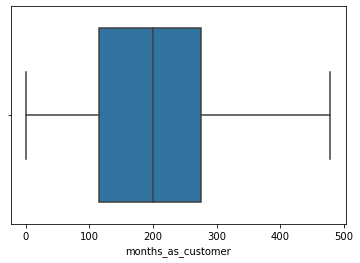

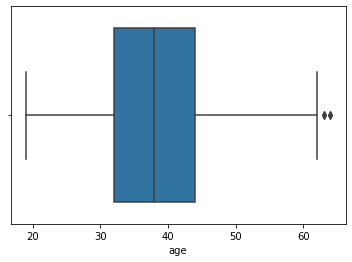

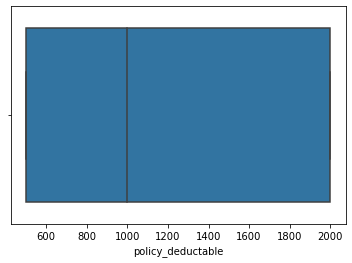

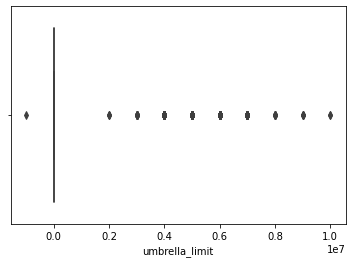

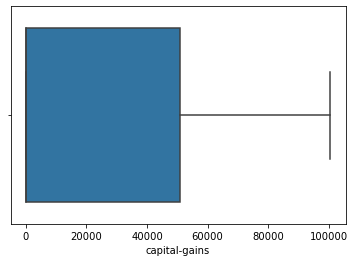

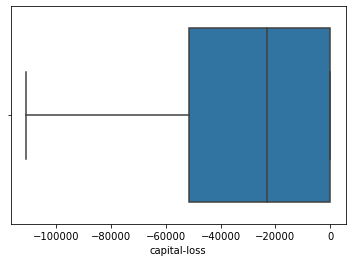

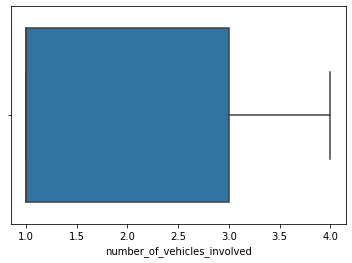

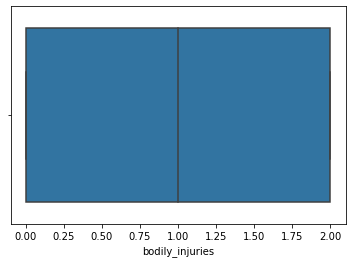

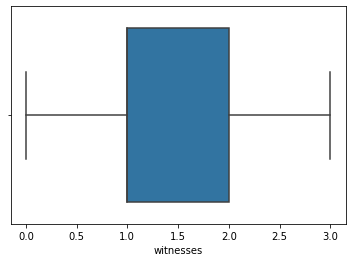

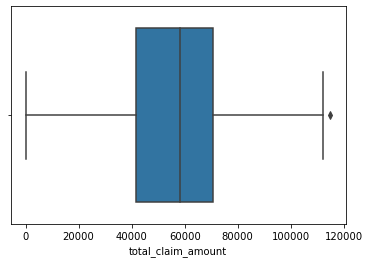

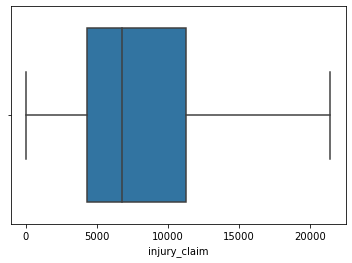

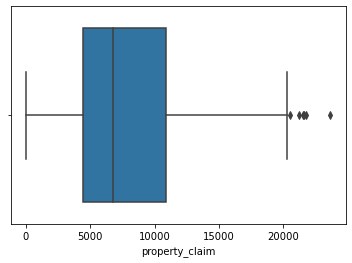

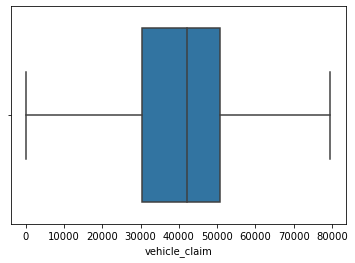

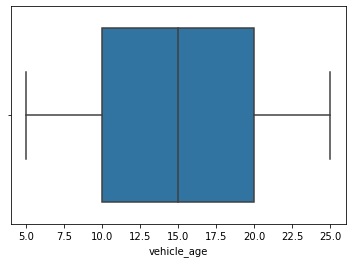

In [41]:
for i in int_label:
    plt.figure()
    sns.boxplot(x=df1[i])

Umberalla limit have many outliers and Property_claim, total_claim_amount,age few outliers.

# Removing Outliers

In [43]:
from scipy.stats import zscore

dfzscore=np.abs(zscore(df1))
print(np.where(dfzscore>3))

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
       657, 700, 763, 807, 875, 922, 975], dtype=int64), array([ 5,  5,  5,  5,  5,  4,  4,  5,  5,  5,  5, 26,  5,  5,  5,  4, 12,
        5,  5,  5], dtype=int64))


In [45]:
dfnew=df1[(dfzscore<3).all(axis=1)]
print('dfnew.shape=',dfnew.shape)

df1=dfnew

dfnew.shape= (980, 34)


In [46]:
# Data Loss

dataloss=(1000-980)/1000*100
dataloss

2.0

Data Loss after removing outliers is 2.0.

# Skewness

In [47]:
df1.skew()

months_as_customer             0.362608
age                            0.475385
policy_state                  -0.038157
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.801424
insured_sex                    0.139324
insured_education_level        0.006286
insured_occupation            -0.055360
insured_hobbies               -0.061488
insured_relationship           0.078339
capital-gains                  0.466619
capital-loss                  -0.376884
incident_type                  0.090563
collision_type                -0.032778
incident_severity              0.277726
authorities_contacted         -0.114044
incident_state                -0.149255
incident_city                  0.043882
number_of_vehicles_involved    0.509725
property_damage                0.853093
bodily_injuries                0.003757
witnesses                      0.026211
police_report_available        0.796221
total_claim_amount            -0.593593


In [48]:
df1['umbrella_limit'].unique()

array([       0,  5000000,  6000000,  4000000,  3000000,  7000000,
       -1000000,  2000000], dtype=int64)

In [49]:
#Looks like umbrella_limit have few values and feels like catagorical, So we'll not change it's skewness.
int_label.remove('umbrella_limit')

In [50]:
#Removing skewness from non object columns
from sklearn.preprocessing import PowerTransformer
PT=PowerTransformer()
for i in int_label:
    if abs(df1.loc[:,i].skew())>0.55:
        df1.loc[:,i]=PT.fit_transform(df1.loc[:,i].values.reshape(-1,1))

In [51]:
df1.skew()

months_as_customer             0.362608
age                            0.475385
policy_state                  -0.038157
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.801424
insured_sex                    0.139324
insured_education_level        0.006286
insured_occupation            -0.055360
insured_hobbies               -0.061488
insured_relationship           0.078339
capital-gains                  0.466619
capital-loss                  -0.376884
incident_type                  0.090563
collision_type                -0.032778
incident_severity              0.277726
authorities_contacted         -0.114044
incident_state                -0.149255
incident_city                  0.043882
number_of_vehicles_involved    0.509725
property_damage                0.853093
bodily_injuries                0.003757
witnesses                      0.026211
police_report_available        0.796221
total_claim_amount            -0.508540


# Correlation

In [52]:
df1.corr()

months_as_customer       age  policy_state  \
months_as_customer                     1.000000  0.922960     -0.007183   
age                                    0.922960  1.000000     -0.020012   
policy_state                          -0.007183 -0.020012      1.000000   
policy_deductable                      0.031041  0.032036      0.017612   
policy_annual_premium                 -0.003814  0.005330      0.015089   
umbrella_limit                         0.018213  0.013256     -0.010921   
insured_sex                            0.059644  0.073790     -0.018002   
insured_education_level               -0.000731  0.001647     -0.027173   
insured_occupation                     0.006925  0.014798     -0.025357   
insured_hobbies                       -0.089358 -0.079099     -0.039501   
insured_relationship                   0.071492  0.076129     -0.017060   
capital-gains                          0.007468 -0.004529      0.068619   
capital-loss                           0.023041  0.012860     -0.031926   
incident_type                         -0.016746 -0.026286      0.032373   
collision_type                        -0.073031 -0.076325      0.049961   
incident_severity                     -0.064094 -0.064396     -0.028353   
authorities_contacted                  0.013782  0.018441     -0.014647   
incident_state                         0.015811  0.012644      0.019456   
incident_city                         -0.006601 -0.006685     -0.002809   
number_of_vehicles_involved            0.011831  0.020391     -0.045514   
property_damage                       -0.000630 -0.008239     -0.013576   
bodily_injuries                       -0.007674 -0.012254      0.012097   
witnesses                              0.063574  0.056360      0.025838   
police_report_available               -0.017200 -0.018135      0.065316   
total_claim_amount                     0.059338  0.068448     -0.015056   
injury_claim                           0.065062  0.077149     -0.048188   
property_claim                         0.036660  0.062375     -0.006420   
vehicle_claim                          0.056360  0.059129     -0.006411   
auto_make                              0.049734  0.033757      0.010259   
auto_model                             0.005130  0.015322     -0.018008   
fraud_reported                         0.021285  0.013279      0.034587   
csl_per_person                        -0.021855 -0.013323      0.001653   
csl_per_accident                       0.007121  0.011258      0.029007   
vehicle_age                           -0.000869 -0.005594      0.001160   

                             policy_deductable  policy_annual_premium  \
months_as_customer                    0.031041              -0.003814   
age                                   0.032036               0.005330   
policy_state                          0.017612               0.015089   
policy_deductable                     1.000000              -0.008300   
policy_annual_premium                -0.008300               1.000000   
umbrella_limit                        0.013471              -0.014107   
insured_sex                          -0.006977               0.041312   
insured_education_level               0.014101              -0.021400   
insured_occupation                   -0.053888               0.027827   
insured_hobbies                      -0.001923              -0.014226   
insured_relationship                 -0.019000               0.004417   
capital-gains                         0.031673              -0.006807   
capital-loss                         -0.019601               0.033133   
incident_type                        -0.032291               0.051606   
collision_type                       -0.055984               0.032604   
incident_severity                    -0.016363              -0.013911   
authorities_contacted                 0.002769              -0.054425   
incident_state                        0.000647               0.048647   
incident_city   

<AxesSubplot:>

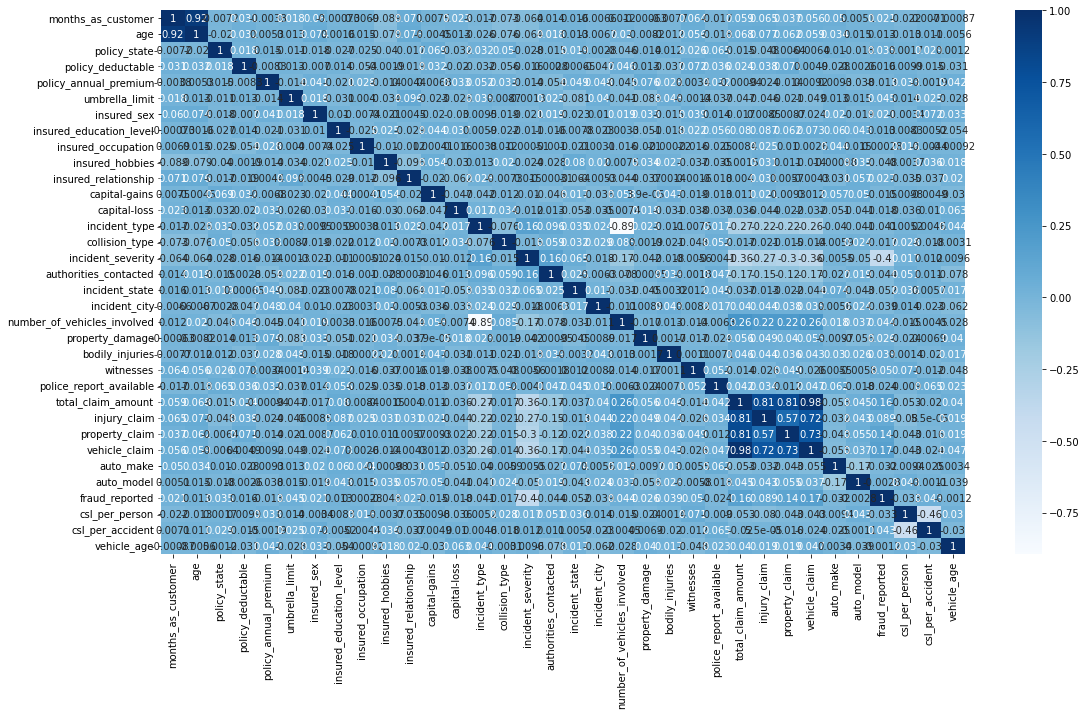

In [55]:
plt.figure(figsize=(18,10))
sns.heatmap(df1.corr(),cmap="Blues",annot=True)

# Splitting dataset into two parts: Input and Target Variable

In [56]:
x = df1.drop("fraud_reported", axis=1)
x

months_as_customer  age  policy_state  policy_deductable  \
0                   328   48             2               1000   
1                   228   42             1               2000   
2                   134   29             2               2000   
3                   256   41             0               2000   
4                   228   44             0               1000   
..                  ...  ...           ...                ...   
995                   3   38             2               1000   
996                 285   41             0               1000   
997                 130   34             2                500   
998                 458   62             0               2000   
999                 456   60             2               1000   

     policy_annual_premium  umbrella_limit  insured_sex  \
0                  1406.91               0            1   
1                  1197.22         5000000            1   
2                  1413.14         5000000            0   
3                  1415.74         6000000            0   
4                  1583.91         6000000            1   
..                     ...             ...          ...   
995                1310.80               0            0   
996                1436.79               0            0   
997                1383.49         3000000            0   
998                1356.92         5000000            1   
999                 766.19               0            0   

     insured_education_level  insured_occupation  insured_hobbies  ...  \
0                          4                   2               17  ...   
1                          4                   6               15  ...   
2                          6                  11                2  ...   
3                          6                   1                2  ...   
4                          0                  11                2  ...   
..                       ...                 ...              ...  ...   
995                        5                   2               13  ...   
996                        6                   9               17  ...   
997                        5                   1                3  ...   
998                        0                   5                0  ...   
999                        0                  11               11  ...   

     police_report_available  total_claim_amount  injury_claim  \
0                          1            0.720163          6510   
1                          0           -1.778146           780   
2                          0           -0.715924          7700   
3                          0            0.395030          6340   
4                          0           -1.730904          1300   
..                       ...                 ...           ...   
995                        0            1.344950         17440   
996                        0            2.210977         18080   
997                        1            0.557034          7500   
998                        1           -0.245515          5220   
999                        0           -1.778474           460   

     property_claim  vehicle_claim  auto_make  auto_model  csl_per_person  \
0             13020       0.758130         10           1               1   
1               780      -1.787485          8          12               1   
2              3850      -0.820246          4          30               0   
3              6340       0.681832          3          34               1   
4               650      -1.740862          0          31               2   
..              ...            ...        ...         ...             ...   
995            8720       1.265008          6           6               2   
996           18080       1.912437         13          28               0   
997            7500       0.781728         11          19               1   
998            5220      -0.102017          1           5      

In [57]:
x.shape

(980, 33)

In [58]:
y=df1['fraud_reported']
y

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 980, dtype: int32

In [59]:
y.shape

(980,)

# SMOTE

In [60]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [61]:
y.value_counts()

1    740
0    740
Name: fraud_reported, dtype: int64

# Scaling

In [62]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

months_as_customer       age  policy_state  policy_deductable  \
0               1.113320  1.045700      1.366991          -0.249732   
1               0.196079  0.360905      0.108815           1.474135   
2              -0.666127 -1.122816      1.366991           1.474135   
3               0.452906  0.246773     -1.149361           1.474135   
4               0.196079  0.589170     -1.149361          -0.249732   
...                  ...       ...           ...                ...   
1475            1.663664  1.730494     -1.149361          -0.173882   
1476           -0.345093 -0.209757      0.108815           1.115570   
1477            0.434561  0.018508      0.108815          -1.111666   
1478           -0.326748 -0.666287      0.108815           1.474135   
1479            0.361182  0.475038     -1.149361           1.474135   

      policy_annual_premium  umbrella_limit  insured_sex  \
0                  0.637409       -0.495134     1.256343   
1                 -0.267553        1.803314     1.256343   
2                  0.664296        1.803314    -0.795961   
3                  0.675517        2.263003    -0.795961   
4                  1.401290        2.263003     1.256343   
...                     ...             ...          ...   
1475               0.396415        1.343624    -0.795961   
1476               0.479246       -0.495134    -0.795961   
1477               0.503836       -0.495134    -0.795961   
1478              -0.508289       -0.495134    -0.795961   
1479               0.618439        2.263003    -0.795961   

      insured_education_level  insured_occupation  insured_hobbies  ...  \
0                    0.645447           -1.188674         1.423389  ...   
1                    0.645447           -0.142909         1.053807  ...   
2                    1.724837            1.164296        -1.348474  ...   
3                    1.724837           -1.450115        -1.348474  ...   
4                   -1.513335            1.164296        -1.348474  ...   
...                       ...                 ...              ...  ...   
1475                 0.645447            1.425738        -0.609310  ...   
1476                 1.185142           -0.927233        -0.978892  ...   
1477                 0.645447           -1.450115        -1.718055  ...   
1478                 1.724837           -0.665792        -0.054938  ...   
1479                -0.433944           -0.404351        -0.978892  ...   

      police_report_available  total_claim_amount  injury_claim  \
0                    1.817230            0.681043     -0.269754   
1                   -0.550288           -2.092807     -1.522873   
2                   -0.550288           -0.913432     -0.009508   
3                   -0.550288            0.320051     -0.306932   
4                   -0.550288           -2.040354     -1.409152   
...                       ...                 ...           ...   
1475                -0.550288           -0.037770     -0.496540   
1476                -0.550288            0.076502     -0.321147   
1477                -0.550288           -0.184212      0.365990   
1478                -0.550288           -0.280131     -0.463736   
1479                -0.550288            0.427748     -0.253352   

      property_claim  vehicle_claim  auto_make  auto_model  csl_per_person  \
0           1.181132       0.712239   0.955164   -1.727781        0.229350   
1          -1.552685      -2.106010   0.430718   -0.675155        0.229350   
2          -0.866997      -1.035180  -0.618172    1.047324       -1.086303   
3          -0.310853       0.627770  -0.880395    1.430097        0.229350   
4          -1.581721      -2.054394  -1.667063    1.143017        1.545004   
...              ...            ...        ...         ...             ...   
1475       -0.414711       0.202237  -1.667063    0.281778        0.229350   
1476       -0.325371       0.291244  -0.093727   -0.579461        0.229350   
1477       -0.675362    

# Finding the best random state

In [63]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc = accuracy_score(y_test, predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu," on Random_state ",maxRS)

Best accuracy is 0.8671171171171171  on Random_state  86


# Creating train_test_split

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [65]:
x_train.shape

(1036, 33)

In [66]:
x_test.shape

(444, 33)

In [67]:
y_train.shape

(1036,)

In [68]:
y_test.shape

(444,)

# Logistic Regression

In [69]:
LR=LogisticRegression()
LR.fit(x_train, y_train)
predlr=LR.predict(x_test)
print("Accuaracy", accuracy_score(y_test, predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuaracy 86.71171171171171
[[202  34]
 [ 25 183]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       236
           1       0.84      0.88      0.86       208

    accuracy                           0.87       444
   macro avg       0.87      0.87      0.87       444
weighted avg       0.87      0.87      0.87       444



In [70]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(LR, x, y, cv=5)
print("Cross validation score of Logistic Regression model:", scr.mean())

Cross validation score of Logistic Regression model: 0.8006756756756758


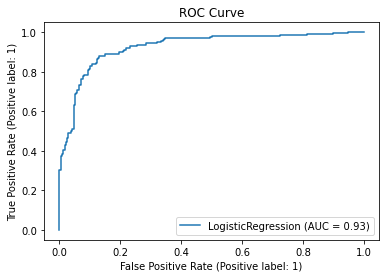

In [71]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(LR, x_test, y_test)
plt.title("ROC Curve")
plt.show()

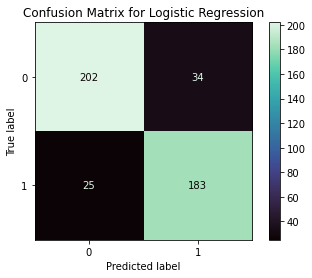

In [72]:
metrics.plot_confusion_matrix(LR, x_test, y_test, cmap='mako')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

# Decision Tree Classifier

In [73]:
dtr=DecisionTreeClassifier()
dtr.fit(x_train, y_train)
preddtr=dtr.predict(x_test)
print("Accuaracy", accuracy_score(y_test, preddtr)*100)
print(confusion_matrix(y_test,preddtr))
print(classification_report(y_test,preddtr))

Accuaracy 79.95495495495496
[[177  59]
 [ 30 178]]
              precision    recall  f1-score   support

           0       0.86      0.75      0.80       236
           1       0.75      0.86      0.80       208

    accuracy                           0.80       444
   macro avg       0.80      0.80      0.80       444
weighted avg       0.81      0.80      0.80       444



In [74]:
scr=cross_val_score(dtr, x, y, cv=5)
print("Cross validation score of Decision Tree Classifier model:", scr.mean())

Cross validation score of Decision Tree Classifier model: 0.8121621621621621


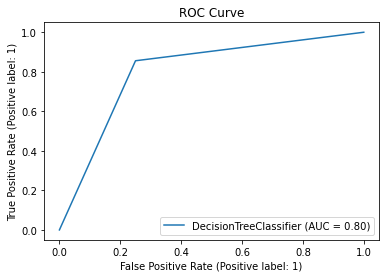

In [75]:
plot_roc_curve(dtr, x_test, y_test)
plt.title("ROC Curve")
plt.show()

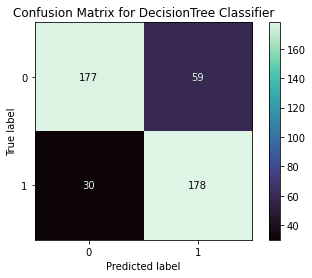

In [76]:
metrics.plot_confusion_matrix(dtr, x_test, y_test, cmap='mako')
plt.title('Confusion Matrix for DecisionTree Classifier')
plt.show()

# KNeighbors Classifier

In [77]:
knc=KNeighborsClassifier()
knc.fit(x_train, y_train)
predknc=knc.predict(x_test)
print("Accuaracy", accuracy_score(y_test, predknc)*100)
print(confusion_matrix(y_test,predknc))
print(classification_report(y_test,predknc))

Accuaracy 69.36936936936937
[[108 128]
 [  8 200]]
              precision    recall  f1-score   support

           0       0.93      0.46      0.61       236
           1       0.61      0.96      0.75       208

    accuracy                           0.69       444
   macro avg       0.77      0.71      0.68       444
weighted avg       0.78      0.69      0.68       444



In [78]:
scr=cross_val_score(knc, x, y, cv=5)
print("Cross validation score of KNeighbors Classifier model:", scr.mean())

Cross validation score of KNeighbors Classifier model: 0.7310810810810812


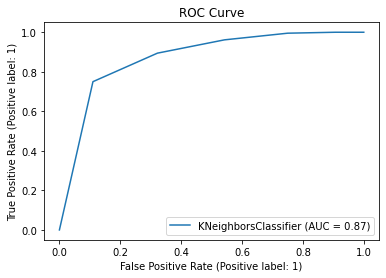

In [79]:
plot_roc_curve(knc, x_test, y_test)
plt.title("ROC Curve")
plt.show()

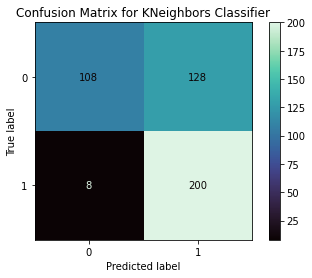

In [80]:
metrics.plot_confusion_matrix(knc, x_test, y_test, cmap='mako')
plt.title('Confusion Matrix for KNeighbors Classifier')
plt.show()

# Support Vector Classifier

In [81]:
sv=SVC()
sv.fit(x_train, y_train)
predsv=sv.predict(x_test)
print("Accuaracy", accuracy_score(y_test, predsv)*100)
print(confusion_matrix(y_test,predsv))
print(classification_report(y_test,predsv))

Accuaracy 88.73873873873875
[[213  23]
 [ 27 181]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       236
           1       0.89      0.87      0.88       208

    accuracy                           0.89       444
   macro avg       0.89      0.89      0.89       444
weighted avg       0.89      0.89      0.89       444



In [82]:
scr=cross_val_score(sv, x, y, cv=5)
print("Cross validation score of Support Vector Classifier model:", scr.mean())

Cross validation score of Support Vector Classifier model: 0.8168918918918919


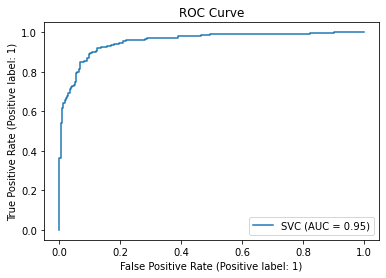

In [83]:
plot_roc_curve(sv, x_test, y_test)
plt.title("ROC Curve")
plt.show()

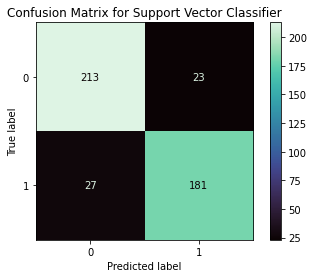

In [84]:
metrics.plot_confusion_matrix(sv, x_test, y_test, cmap='mako')
plt.title('Confusion Matrix for Support Vector Classifier')
plt.show()

# Ensemble Technique

In [85]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=200)
rf.fit(x_train, y_train)
predrf=rf.predict(x_test)
print("Accuaracy", accuracy_score(y_test, predrf)*100)  # testing accuracy
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuaracy 88.73873873873875
[[208  28]
 [ 22 186]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       236
           1       0.87      0.89      0.88       208

    accuracy                           0.89       444
   macro avg       0.89      0.89      0.89       444
weighted avg       0.89      0.89      0.89       444



In [86]:
scr=cross_val_score(rf, x, y, cv=5)
print("Cross validation score of RandomForest Classifier model:", scr.mean())

Cross validation score of RandomForest Classifier model: 0.8594594594594595


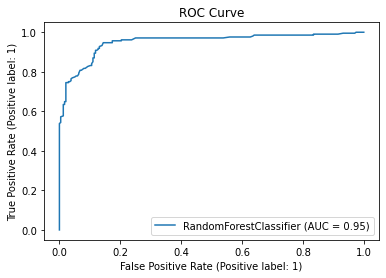

In [87]:
plot_roc_curve(rf, x_test, y_test)
plt.title("ROC Curve")
plt.show()

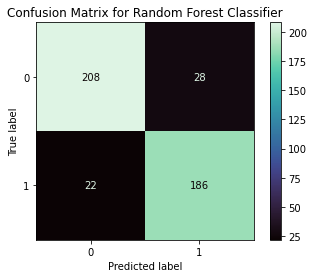

In [88]:
metrics.plot_confusion_matrix(rf, x_test, y_test, cmap='mako')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

# AdaBoost Classifier

In [93]:
from sklearn.ensemble import AdaBoostClassifier

ad=AdaBoostClassifier()
ad.fit(x_train, y_train)
predad=ad.predict(x_test)
print("Accuaracy", accuracy_score(y_test, predad)*100)  # testing accuracy
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

Accuaracy 88.51351351351352
[[207  29]
 [ 22 186]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       236
           1       0.87      0.89      0.88       208

    accuracy                           0.89       444
   macro avg       0.88      0.89      0.88       444
weighted avg       0.89      0.89      0.89       444



In [97]:
scr=cross_val_score(ad, x, y, cv=5)
print("Cross validation score of AdaBoostClassifier model:", scr.mean())

Cross validation score of AdaBoostClassifier model: 0.847972972972973


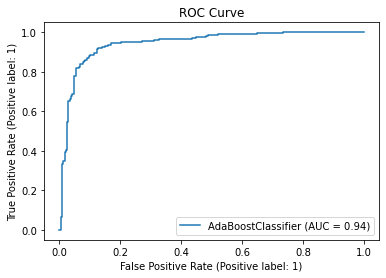

In [95]:
plot_roc_curve(ad, x_test, y_test)
plt.title("ROC Curve")
plt.show()

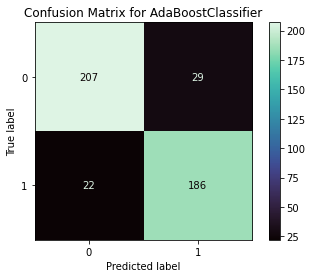

In [98]:
metrics.plot_confusion_matrix(ad, x_test, y_test, cmap='mako')
plt.title('Confusion Matrix for AdaBoostClassifier')
plt.show()

In [99]:
RandomForestClassifier()

RandomForestClassifier()

In [100]:
from sklearn.model_selection import GridSearchCV

parameters={'max_features':['auto','sqrt','log2'],
           'max_depth':[4,5,6,7,8],
           'criterion':['gini','entropy'],
           'n_estimators':[100,200,300,400,500]}

In [101]:
GCV=GridSearchCV(estimator=RandomForestClassifier(),
                param_grid=parameters,
                cv=5,
                scoring='accuracy')

In [103]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='accuracy')

In [104]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 100}

In [105]:
type(GCV)

sklearn.model_selection._search.GridSearchCV

In [106]:
RandomForestClassifier()

RandomForestClassifier()

In [107]:
GCV.best_estimator_

RandomForestClassifier(max_depth=8, max_features='auto')

In [108]:
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.8941441441441441

# Saving the best model

In [109]:
import joblib

joblib.dump(rf,'insurancemodel.obj')

insurance_loadmodel=joblib.load('insurancemodel.obj')
insurance_loadmodel.predict(x_test)

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,

In [110]:
conclusion=pd.DataFrame([insurance_loadmodel.predict(x_test)[:],predrf[:]],index=['Predicted','Original'])
conclusion

0    1    2    3    4    5    6    7    8    9    ...  434  435  \
Predicted    0    0    1    0    0    0    0    0    1    0  ...    1    0   
Original     0    0    1    0    0    0    0    0    1    0  ...    1    0   

           436  437  438  439  440  441  442  443  
Predicted    1    0    0    1    1    1    0    1  
Original     1    0    0    1    1    1    0    1  

[2 rows x 444 columns]